In [1]:
# from inky import InkyPHAT


class InkyPHAT:
    def __init__(self,colour):
        self.WIDTH = 240
        self.HEIGHT = 120
        self.WHITE =  (255,255,255) # 0
        self.BLACK =  (0,0,0) # 1
        self.RED =  2        
        
    def set_border(self,colour):
        pass

In [2]:
      
inky_display = InkyPHAT("black")
# for faster B&W set black, the tri colour refresh cycle takes longer
inky_display.set_border(inky_display.WHITE)

In [3]:
from PIL import Image, ImageFont, ImageDraw


# img = Image.new("P", (inky_display.WIDTH, inky_display.HEIGHT))
img = Image.new("RGB", (inky_display.WIDTH, inky_display.HEIGHT))


draw = ImageDraw.Draw(img)

# ctrl shift minus to split cells in edit mode

In [4]:
# blank white screen to start
draw.rectangle([(0,0),(inky_display.WIDTH, inky_display.HEIGHT)],fill=inky_display.WHITE)


midWidth = inky_display.WIDTH / 2 + 10 # teeny bit to the right 
midHeight = inky_display.HEIGHT / 2 + 10 # and teeny bit lower looks better

radius1 = 43
radius2 = 53

Circle1 = (midWidth-radius1, midHeight-radius1, midWidth+radius1, midHeight+radius1)
Circle2 = (midWidth-radius2, midHeight-radius2, midWidth+radius2, midHeight+radius2)

draw.arc( Circle1 , 135, 45, fill = inky_display.BLACK)
draw.arc( Circle2 , 135, 45, fill = inky_display.BLACK)

draw.point([midWidth,midHeight])

draw.pieslice( Circle2 ,135, 290, fill = inky_display.BLACK)
#draw pie segment to show progress thru day

draw.ellipse( Circle1, fill = inky_display.WHITE, outline =  inky_display.WHITE)



In [5]:
# from font_hanken_grotesk import HankenGroteskLight

# fontLabel = ImageFont.truetype(HankenGroteskLight, 16)
# fontNumber = ImageFont.truetype(HankenGroteskLight, 18)
# fontBig = ImageFont.truetype(HankenGroteskLight, 20)

ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",14)

fontLabel = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",16)
fontNumber = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",18)
fontBig = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",20)


msg1 = "Sun Rise:"
msg2 = "08:00"

msg3 = "Today:"
msg4 = "16h38m"

msg5 = "Sun Set:"
msg6 = "17:15"

msg7 = "124°"  #shift option 8 for ° degree symbol 
msg8 = "45°"
msg9 = "16h34m" #time left to sunset
msgA = "07:25"

# get text box size for each of our fields
w1, h1 = fontLabel.getsize(msg1)
w2, h2 = fontNumber.getsize(msg2)
w3, h3 = fontLabel.getsize(msg3)
w4, h4 = fontNumber.getsize(msg4)
w5, h5 = fontLabel.getsize(msg5)
w6, h6 = fontNumber.getsize(msg6)
w7, h7 = fontNumber.getsize(msg7)
w8, h8 = fontNumber.getsize(msg8)
w9, h9 = fontBig.getsize(msg9)
wA, hA = fontNumber.getsize(msgA)

#calculate location for msg1-msg3
loc1 = (0,0)                             # top left
loc2 = (0,h1+1)                          # under top left
loc3 = (0,inky_display.HEIGHT - h3 - h4) # above botton left
loc4 = (0,inky_display.HEIGHT - h3)      # botton left

loc5 = (inky_display.WIDTH - w5, 0)      # top right
loc6 = (inky_display.WIDTH - w6, h5)     # under top right / h5
loc7 = (midWidth - w7/2, midHeight )     # centered hanging from mid point
loc8 = (midWidth - w8/2, midHeight + h7 )            # centered below msg7

loc9 = (midWidth - w9/2, midHeight - h9)  # centred above midpoint 
 
locA= (inky_display.WIDTH - wA, inky_display.HEIGHT - hA ) # bottom right

draw.text(loc1, msg1, inky_display.BLACK, fontLabel)
draw.text(loc2, msg2, inky_display.BLACK, fontNumber)
draw.text(loc3, msg3, inky_display.BLACK, fontLabel)
draw.text(loc4, msg4, inky_display.BLACK, fontNumber)
draw.text(loc5, msg5, inky_display.BLACK, fontLabel)
draw.text(loc6, msg6, inky_display.BLACK, fontNumber)
draw.text(loc7, msg7, inky_display.BLACK, fontNumber)
draw.text(loc8, msg8, inky_display.BLACK, fontNumber)
draw.text(loc9, msg9, inky_display.BLACK, fontBig)
draw.text(locA, msgA, inky_display.BLACK, fontNumber)


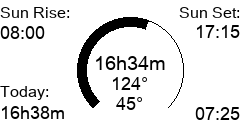

In [6]:
#print the graph inline - instead of to inky phat
%matplotlib inline


display(img)